In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import math

In [39]:
location = pd.read_csv("0915.csv")

In [40]:
def string_to_mins(ts):
    a = int(ts.split(':')[0])
    b = int(ts.split(':')[1])
    c = a*60 + b
    return c
location['cos'] = pd.to_datetime(location['start_time'], format='%H:%M', errors='ignore').apply(string_to_mins)
location['cos'] = np.cos((location['cos']/1440)*2*np.pi-0.5*np.pi)
location

,location_id,longitude,latitude,start_date,start_time,weekday,duration,speed,name1,name2,name3,name4,name5,category1,category2,category3,category4,category5,cos
0,1,121.576000,24.986000,2020/07/22,11:00,4,NaN,NaN,myhome,myhome1,myhome2,myhome3,myhome4,c1,c2,c3,c4,c5,2.588190e-01
1,2,121.443000,24.433000,2020/07/23,12:00,5,NaN,NaN,apple,apple1,apple2,apple3,apple4,c1,c2,c3,c4,c5,6.123234e-17
2,3,121.123000,24.765000,2020/07/24,13:00\n,6,NaN,NaN,banana,banana1,banana2,banana3,banana4,c1,c2,c3,c4,c5,-2.588190e-01
3,4,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,1.088669e-01
4,5,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,1.088669e-01
5,6,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,1.088669e-01
6,7,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,1.088669e-01
7,8,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,4.344453e-01
8,9,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,4.344453e-01
9,10,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,4.344453e-01


In [47]:
df = pd.DataFrame({
    'x': location['longitude'],
    'y': location['latitude'],
    'z': location['cos']
})
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
cluster_labels = kmeans.fit(df).labels_
print(cluster_labels)

[2 2 2 ... 0 0 0]


In [49]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


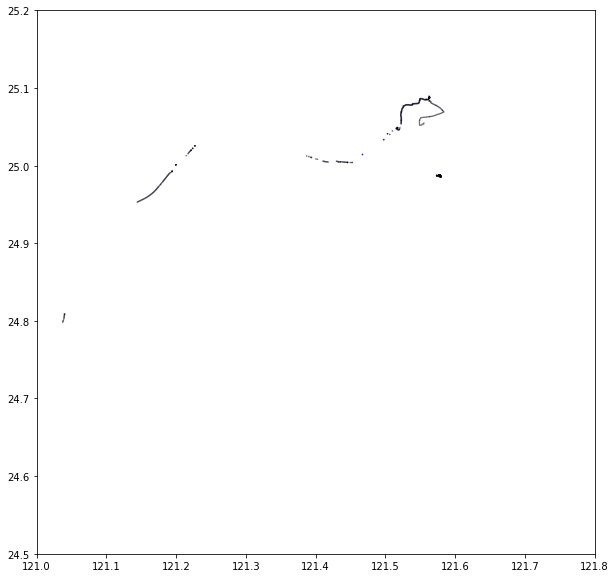

In [50]:
fig = plt.figure(figsize=(10,10))

colmap = {1:'r', 2:'g',3:'b', 4:'gray', 5:'cyan'}
colors = map(lambda x: colmap[x+1], labels)

plt.scatter(df['x'], df['y'], df['z'], color=list(colors), alpha=0.5, edgecolor = 'k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])

plt.xlim(121.0,121.8)
plt.ylim(24.5,25.2)
plt.show()